In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# File Path


In [5]:
# root = './train_image/'
root = './each_label/'

# Image Denoise

In [45]:
def get_bin_table(threshold=120):
    table = []
    for i in range(256):
        if i < threshold:
            table.append(0)
        else:
            table.append(1)
    return table

def remove_noise_pixel(img, noise_point_list):
    for item in noise_point_list:
        img.putpixel((item[0], item[1]), 1)

def collect_noise_point(img):
    noise_point_list = []
    for x in range(img.width):
        for y in range(img.height):
            res_9 = sum_9_region_new(img, x, y)
            if (0 < res_9 < 3) and img.getpixel((x, y)) == 0:
                pos = (x, y)
                noise_point_list.append(pos)
    return noise_point_list

def sum_9_region_new(img, x, y):
    cur_pixel = img.getpixel((x, y))
    width = img.width
    height = img.height
    if cur_pixel == 1:
        return 0
    if y < 3:
        return 1
    elif y > height - 3:
        return 1
    else:
        if x < 3:
            return 1
        elif x == width - 1:
            return 1
        else:
            sum = img.getpixel((x - 1, y - 1)) \
                  + img.getpixel((x - 1, y)) \
                  + img.getpixel((x - 1, y + 1)) \
                  + img.getpixel((x, y - 1)) \
                  + cur_pixel \
                  + img.getpixel((x, y + 1)) \
                  + img.getpixel((x + 1, y - 1)) \
                  + img.getpixel((x + 1, y)) \
                  + img.getpixel((x + 1, y + 1))
            return 9 - sum

# Load data


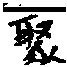

In [46]:
is_denoise = False
data = []
files = []
binary = None
for idx, dir_ in enumerate(os.listdir(root)):
    for _, file in enumerate(os.listdir(root + '/' + dir_)):
        img_path = root + dir_ + '/' + file
        img = Image.open(img_path)
        img = img.resize((67, 67))
        im = np.array(img).reshape(-1)
        if is_denoise:
            table = get_bin_table(np.mean(im))
            binary = img.point(table, '1')
            noise_point_list = collect_noise_point(binary)
            remove_noise_pixel(binary, noise_point_list)
            im = np.array(binary).reshape(-1)
        data.append(im)
        files.append(file)
    if idx == 50:
        break
train_img = np.array(data)
binary

In [47]:
print(train_img.shape)

(68787, 4489)


# K-means

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(train_img)
print(reduced_data.shape)
kmeans = KMeans(init="k-means++", n_clusters=50, n_init=10, n_jobs=4, max_iter=1000, algorithm='elkan')
kmeans.fit(train_img)

c:\users\zxcz1\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [44]:
result = {}
print(kmeans.labels_)
for i in range(50):
    result[str(i)] = []
for i in range(len(kmeans.labels_)):
    result[str(kmeans.labels_[i])] += [files[i]]
result

[6 8 7 8 9 5 8 8 3 6 2 1 8 9 2 4 6 8 4 7 9 8 8 0 8 6 0 8 4 3 1 6 2 0 6 8 7
 8 7 2 1 9 0 8 7 6 6 8 0 7 3 8 1 8 7 8 7 7 7 6 6 5 0 6 7 8 8 9 6 8 0 6 7 2
 0 7 9 8 7 7 2 8 1 7 8 6 7 5 3 2 8 0 4 8 0 8 8 9 5 7 4 5 9 6 8 3 8 8 1 8 4
 4 5 3 6 7 3 3 5 0 1 8 7 7 2 9 4 6 7 1 4 9 4 4 7 7 1 4 1 0 7 2 6 7 2 3 1 6
 4 1 0 6 5 8 8 7 1 9 8 8 5 1 4 8 2 6 9 3 5 7 8 2 7 1 6 7 2 8 3 5 6 7 7 5 9
 2 6 7 6 8 9 7 9 5 8 7 8 4 2 2 3 5 2 5 6 3 7 3 7 6 3 7 2 1 2 8 1 3 5 0 1 7
 5 3 3 0 2 2 6 7 4 3 6 2 2 3 6 4 2 3 7 3 7 8 6 6 2 4 0 7 0 7 2 6 6 7 1 2 3
 5 5 5 5 3 9 2 6 3 3 3 3 3 6 7 7 3 2 3 8 7 1 3 9 5 3 0 1 3 2 6 1 5 7 5 3 9
 7 5 1 5 2 9 3 6 6 3 5 2 1 3 6 7 2 7 4 1 7 1 5 8 8 3 3 3 3 8 1 3 6 3 5 3 3
 8 7 3 1 8 6 8 7 1 7 1 1 3 1 6 4 7 3 1 6 7 7 7 0 3 3 9 8 3 7 5 5 9 7 1 9 8
 6 6 8 9 2 1 9 0 3 3 8 6 9 4 3 7 5 1 3 3 6 2 7 5 0 7 6 4 5 6 5 7 5 4 4 1 9
 4 4 7 4 4 4 6 7 3 6 7 7 4 1 4 4 7 4 9 4 4 4 1 4 5 6 7 8 4 4 5 4 9 4 4 7 1
 2 7 6 6 4 4 9 4 5 1 7 1 7 4 4 4 4 4 6 7 4 4 3 4 4 4 7 6 4 0 7 1 6 4 5 3 3
 3 2 3 2 6 3 3 3 1 7 4 7 

{'0': ['21077_宋.jpg',
  '22144_宋.jpg',
  '26973_宋.jpg',
  '34341_宋.jpg',
  '39265_宋.jpg',
  '48298_宋.jpg',
  '55958_宋.jpg',
  '58777_宋.jpg',
  '67456_宋.jpg',
  '68247_宋.jpg',
  '23857_名.jpg',
  '36379_名.jpg',
  '43437_名.jpg',
  '19125_歐.jpg',
  '22043_歐.jpg',
  '3491_歐.jpg',
  '35093_歐.jpg',
  '60862_歐.jpg',
  '48167_五.jpg',
  '56391_五.jpg',
  '68566_五.jpg',
  '8190_禎.jpg',
  '43412_敬.jpg',
  '60438_敬.jpg',
  '66530_敬.jpg',
  '66413_報.jpg',
  '10231_柯.jpg',
  '17623_柯.jpg',
  '18075_柯.jpg',
  '23579_柯.jpg',
  '26383_柯.jpg',
  '28823_柯.jpg',
  '29620_柯.jpg',
  '2994_柯.jpg',
  '33053_柯.jpg',
  '37488_柯.jpg',
  '46522_柯.jpg',
  '47105_柯.jpg',
  '5016_柯.jpg',
  '58287_柯.jpg',
  '60658_柯.jpg',
  '67784_柯.jpg',
  '19396_清.jpg'],
 '1': ['14375_宋.jpg',
  '24185_宋.jpg',
  '32622_宋.jpg',
  '44130_宋.jpg',
  '63173_宋.jpg',
  '16398_名.jpg',
  '24462_名.jpg',
  '29810_名.jpg',
  '33711_名.jpg',
  '35875_名.jpg',
  '40029_名.jpg',
  '43274_名.jpg',
  '49093_名.jpg',
  '52290_名.jpg',
  '59061_名.jpg',
  '1464

# Plot the result

In [ ]:
import matplotlib.pyplot as plt
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=1, linewidths=1,
            color="w", zorder=10)
plt.title("K-means clustering result (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()